In [1]:
!pip install -q scanpy[leiden] harmonypy symphonypy 2>/dev/null

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 61.8 MB/s eta 0:00:00


In [ ]:
!pip install --user scikit-misc

In [ ]:
!pip install sccoda

In [ ]:
!wget https://datasets.cellxgene.cziscience.com/dbed890d-a14a-4502-a413-b57a4650d3af.h5ad

In [5]:
import scanpy as sc
import scanpy.external as sce
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import sccoda.datasets as scd
from sccoda.util import cell_composition_data as dat
from scipy.stats import ttest_ind
from sccoda.util import comp_ana as mod
from sccoda.util import data_visualization as viz
from statsmodels.stats.multitest import multipletests

warnings.filterwarnings('ignore')

In [6]:
adata = sc.read_h5ad('dbed890d-a14a-4502-a413-b57a4650d3af.h5ad', backed='r')

In [7]:
adata

AnnData object with n_obs × n_vars = 108717 × 21648 backed at 'dbed890d-a14a-4502-a413-b57a4650d3af.h5ad'
    obs: 'nCount_RNA', 'nFeature_RNA', 'Lane', 'demux_doublet_call', 'demux_RD_TOTL', 'demux_RD_PASS', 'demux_RD_UNIQ', 'demux_N_SNP', 'demux_PRB_DBL', 'percent_mt', 'scrub_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'norm_library_size', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'pair_index_CW', 'live_cells', 'dead_cells', 'pct_alive', 'MY_MTX', 'MY_bDMARD', 'MY_pt_global', 'MY_md_global', 'MY_tjc', 'MY_sjc', 'MY_esr', 'MY_crp', 'MY_cdai', 'MY_das28esr4', 'MY_das28crp4', 'MY_RF_status', 'MY_CCP_Status', 'activity_python_crp', 'activity_python_binary_crp', 'activity_python_esr', 'activity_python_binary_esr', 'leiden_r3.0', 'rough_annot', 'fine_annot', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'disease_

In [8]:
adata.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000186092,False,False,False,4.0,0.000025,99.997508,4.0,4.0,False,OR4F5,NCBITaxon:9606,gene,2618,protein_coding
ENSG00000239945,False,False,False,18.0,0.000112,99.988785,18.0,18.0,False,ENSG00000239945,NCBITaxon:9606,gene,1319,lncRNA
ENSG00000241599,False,False,False,9.0,0.000056,99.994393,9.0,9.0,False,ENSG00000241599,NCBITaxon:9606,gene,457,lncRNA
ENSG00000229905,False,False,False,8.0,0.000050,99.995016,8.0,8.0,False,ENSG00000229905,NCBITaxon:9606,gene,456,lncRNA
ENSG00000237491,False,False,False,1393.0,0.008972,99.132120,1440.0,1393.0,False,LINC01409,NCBITaxon:9606,gene,1089,lncRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000278384,False,False,False,915.0,0.006012,99.429928,965.0,915.0,False,ENSG00000278384,NCBITaxon:9606,gene,3027,protein_coding
ENSG00000276345,False,False,False,234.0,0.001470,99.854211,236.0,234.0,False,ENSG00000276345,NCBITaxon:9606,gene,740,protein_coding
ENSG00000277856,False,False,False,8.0,0.000050,99.995016,8.0,8.0,False,ENSG00000277856,NCBITaxon:9606,gene,294,protein_coding
ENSG00000275063,False,False,False,6.0,0.000044,99.996262,7.0,6.0,False,ENSG00000275063,NCBITaxon:9606,gene,351,protein_coding


In [9]:
if 'mt' not in adata.var.columns:
    prefixes = ['MT-', 'mt-', 'Mt-', 'MT.', 'mt.']
    mt_found = False
    for prefix in prefixes:
        mt_genes = adata.var_names.str.startswith(prefix)
        if mt_genes.sum() > 0:
            adata.var['mt'] = mt_genes
            print(f"Найдено {mt_genes.sum()} митохондриальных генов с префиксом '{prefix}'")
            mt_found = True
            break
    if not mt_found:
        adata.var['mt'] = False
        print("Митохондриальные гены не найдены")

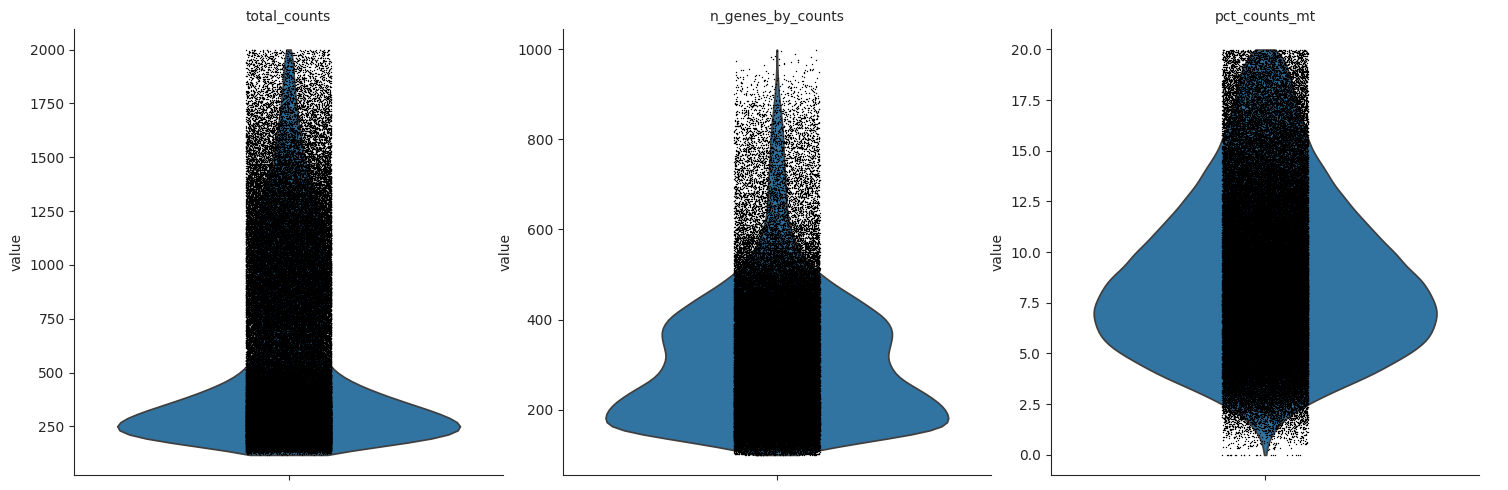

In [10]:
# Plotting of QC
sc.pl.violin(adata, keys=["total_counts", "n_genes_by_counts",
                          "pct_counts_mt"], multi_panel=True)

In [11]:
print(f"До фильтрации: {adata.shape}")
if not adata.is_view and adata.isbacked:
    adata = adata.to_memory()

До фильтрации: (108717, 21648)


In [12]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=10)
if 'pct_counts_mt' in adata.obs.columns:
    adata = adata[adata.obs.pct_counts_mt < 20, :]
print(f"После фильтрации: {adata.shape}")

if np.max(adata.X[:100]) > 100:
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    print("Данные нормализованы и логарифмированы")
else:
    print("Данные уже нормализованы, пропускаем этот шаг")

После фильтрации: (5719, 11964)
Данные уже нормализованы, пропускаем этот шаг


In [13]:
sc.pp.highly_variable_genes(adata, batch_key='donor_id',
                           n_top_genes=3000, flavor='seurat')
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
print(f"Выбрано {adata.shape[1]} высоковариабельных генов")

Выбрано 3000 высоковариабельных генов


In [14]:
sc.pp.scale(adata, max_value=10)
sc.pp.pca(adata, n_comps=50, svd_solver='arpack')

sce.pp.harmony_integrate(adata, key='donor_id', max_iter_harmony=30)
use_rep = 'X_pca_harmony'
print("Интеграция Harmony выполнена")

sc.pp.neighbors(adata, use_rep=use_rep, n_neighbors=20, n_pcs=30)
sc.tl.leiden(adata, resolution=0.8, key_added='cluster')
sc.tl.umap(adata)

print(f"Получено {adata.obs['cluster'].nunique()} кластеров")

2025-12-17 06:15:55,827 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2025-12-17 06:15:58,665 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2025-12-17 06:15:58,718 - harmonypy - INFO - Iteration 1 of 30
INFO:harmonypy:Iteration 1 of 30
2025-12-17 06:16:01,794 - harmonypy - INFO - Iteration 2 of 30
INFO:harmonypy:Iteration 2 of 30
2025-12-17 06:16:04,784 - harmonypy - INFO - Iteration 3 of 30
INFO:harmonypy:Iteration 3 of 30
2025-12-17 06:16:11,016 - harmonypy - INFO - Iteration 4 of 30
INFO:harmonypy:Iteration 4 of 30
2025-12-17 06:16:12,513 - harmonypy - INFO - Converged after 4 iterations
INFO:harmonypy:Converged after 4 iterations


Интеграция Harmony выполнена
Получено 10 кластеров


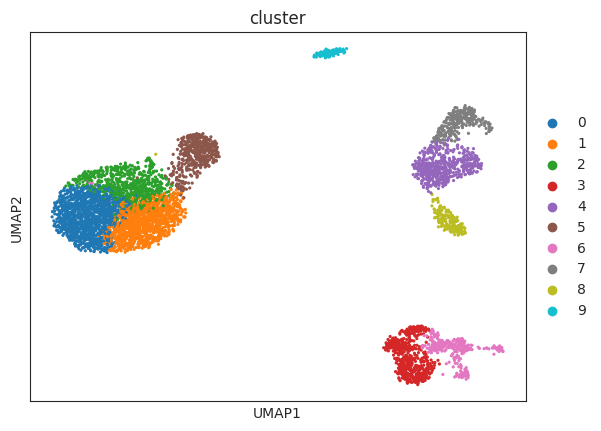

In [15]:
sc.pl.umap(adata, color="cluster")

In [16]:
# Находим маркерные гены
sc.tl.rank_genes_groups(adata, 'cluster', method='wilcoxon',
                        use_raw=False, pts=True)

marker_results = sc.get.rank_genes_groups_df(adata, group=None)
marker_results = marker_results[marker_results['pvals_adj'] < 0.05]

print(f"Найдено {len(marker_results)} значимых маркерных генов")
for cluster in sorted(adata.obs['cluster'].unique()):
    top_markers = marker_results[marker_results['group'] == cluster].head(5)
    print(f"Кластер {cluster}: {', '.join(top_markers['names'].tolist())}")

Найдено 5301 значимых маркерных генов
Кластер 0: ENSG00000163220, ENSG00000143546, ENSG00000163221, ENSG00000038427, ENSG00000169429
Кластер 1: ENSG00000125538, ENSG00000245532, ENSG00000100906, ENSG00000120129, ENSG00000167996
Кластер 2: ENSG00000204287, ENSG00000034510, ENSG00000101439, ENSG00000197956, ENSG00000204472
Кластер 3: ENSG00000075624, ENSG00000257764, ENSG00000169045, ENSG00000213639, ENSG00000143443
Кластер 4: ENSG00000227507, ENSG00000008517, ENSG00000167286, ENSG00000168685, ENSG00000198668
Кластер 5: ENSG00000204482, ENSG00000204472, ENSG00000203747, ENSG00000087086, ENSG00000167996
Кластер 6: ENSG00000169045, ENSG00000143443, ENSG00000119335, ENSG00000110367, ENSG00000164548
Кластер 7: ENSG00000105374, ENSG00000115523, ENSG00000145649, ENSG00000100453, ENSG00000166710
Кластер 8: ENSG00000211592, ENSG00000156738, ENSG00000227507, ENSG00000105369, ENSG00000007312
Кластер 9: ENSG00000100453, ENSG00000173457, ENSG00000132465, ENSG00000152492, ENSG00000166428


In [17]:
symbol_col = 'feature_name'

original_index = adata.var.index
adata.var.index = adata.var[symbol_col]
adata.var['original_id'] = original_index

sc.tl.rank_genes_groups(adata, 'cluster', method='wilcoxon', use_raw=False)

marker_results = sc.get.rank_genes_groups_df(adata, group=None)
print(marker_results.head())

  group    names     scores  logfoldchanges          pvals      pvals_adj
0     0   S100A9  47.185043             NaN   0.000000e+00   0.000000e+00
1     0   S100A8  46.708931             NaN   0.000000e+00   0.000000e+00
2     0  S100A12  38.446156             NaN   0.000000e+00   0.000000e+00
3     0     VCAN  32.626846             NaN  1.707364e-233  1.280523e-230
4     0    CXCL8  31.158712             NaN  3.865291e-213  2.319174e-210


In [18]:
marker_results

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,S100A9,47.185043,NaN,0.000000e+00,0.000000e+00
1,0,S100A8,46.708931,NaN,0.000000e+00,0.000000e+00
2,0,S100A12,38.446156,NaN,0.000000e+00,0.000000e+00
3,0,VCAN,32.626846,NaN,1.707364e-233,1.280523e-230
4,0,CXCL8,31.158712,NaN,3.865291e-213,2.319174e-210
...,...,...,...,...,...,...
29995,9,COTL1,-11.263474,NaN,1.987642e-29,3.138382e-27
29996,9,SAT1,-11.614655,NaN,3.471841e-31,5.786402e-29
29997,9,NFKBIA,-11.796107,NaN,4.087868e-32,8.175736e-30
29998,9,LYZ,-12.617649,NaN,1.687844e-36,4.603211e-34


In [19]:
print(f"Найдено {len(marker_results)} значимых маркерных генов")
for cluster in sorted(adata.obs['cluster'].unique()):
    top_markers = marker_results[marker_results['group'] == cluster].head(5)
    print(f"Кластер {cluster}: {', '.join(top_markers['names'].tolist())}")

Найдено 30000 значимых маркерных генов
Кластер 0: S100A9, S100A8, S100A12, VCAN, CXCL8
Кластер 1: IL1B, NEAT1, NFKBIA, DUSP1, FTH1
Кластер 2: HLA-DRA, TMSB10, CST3, S100A6, AIF1
Кластер 3: ACTB, ENSG00000257764, HNRNPH1, PPP1CB, C1orf56
Кластер 4: LTB, IL32, CD3D, IL7R, CALM1
Кластер 5: LST1, AIF1, FCGR3A, FTL, FTH1
Кластер 6: HNRNPH1, C1orf56, SET, DDX6, TRA2A
Кластер 7: NKG7, GNLY, GZMA, GZMB, B2M
Кластер 8: IGKC, MS4A1, LTB, CD79A, CD79B
Кластер 9: GZMB, PPP1R14B, JCHAIN, CCDC50, PLD4


In [20]:
marker_dict = {
    'CD4+ T cell': ['CD3D', 'CD3E', 'CD4', 'IL7R', 'CCR7'],
    'CD8+ T cell': ['CD3D', 'CD3E', 'CD8A', 'CD8B', 'GZMK', 'GZMB'],
    'B cell': ['CD79A', 'MS4A1', 'CD19', 'CD79B'],
    'Monocyte (CD14+)': ['CD14', 'LYZ', 'FCN1', 'S100A8', 'S100A9'],
    'Monocyte (CD16+)': ['FCGR3A', 'LYZ', 'MS4A7', 'CDKN1C'],
    'NK cell': ['NKG7', 'GNLY', 'KLRD1', 'NCAM1', 'KLRF1'],
    'Dendritic cell': ['FCER1A', 'CST3', 'CLEC10A', 'CD1C'],
    'Plasmacytoid DC': ['IL3RA', 'CLEC4C', 'IRF7', 'TCF4'],
    'Platelet': ['PPBP', 'PF4', 'GP9', 'TUBB1'],
    'Erythrocyte': ['HBA1', 'HBA2', 'HBB', 'AHSP'],
    'Stem cell': ['CD34', 'PROM1', 'THY1', 'KIT'],
    'Multipotent Progenitor (MPP)': ['CD34', 'FLT3', 'PTPRC', 'CD38', 'MLLT3', 'HLF'],
    'Progenitor Cell': ['MKI67', 'TOP2A', 'PCNA', 'STMN1', 'TYMS', 'CDC20']
}


In [21]:
def annotate_cluster(cluster_id, top_n=10):
    cluster_markers = marker_results[marker_results['group'] == cluster_id]
    top_genes = set(cluster_markers.head(top_n)['names'].tolist())

    scores = {}
    for cell_type, markers in marker_dict.items():
        overlap = len(top_genes.intersection(set(markers)))
        if overlap > 0:
            scores[cell_type] = overlap / len(markers) * 100

    if scores:
        best_match = max(scores.items(), key=lambda x: x[1])
        return best_match[0], best_match[1], scores
    return "Unknown", 0, {}


In [22]:
annotation_dict = {}
confidence_dict = {}

for cluster in sorted(adata.obs['cluster'].unique()):
    cell_type, confidence, all_scores = annotate_cluster(cluster, top_n=15)
    annotation_dict[cluster] = cell_type
    confidence_dict[cluster] = confidence

    print(f"Кластер {cluster}: {cell_type} (уверенность: {confidence:.1f}%)")
    if confidence < 50:
        print(f"  Альтернативы: {sorted(all_scores.items(), key=lambda x: x[1], reverse=True)[:3]}")

adata.obs['auto_annotation'] = adata.obs['cluster'].map(annotation_dict)

Кластер 0: Monocyte (CD14+) (уверенность: 80.0%)
Кластер 1: Dendritic cell (уверенность: 25.0%)
  Альтернативы: [('Dendritic cell', 25.0), ('Monocyte (CD14+)', 20.0)]
Кластер 2: Dendritic cell (уверенность: 25.0%)
  Альтернативы: [('Dendritic cell', 25.0), ('Monocyte (CD14+)', 20.0)]
Кластер 3: Monocyte (CD16+) (уверенность: 25.0%)
  Альтернативы: [('Monocyte (CD16+)', 25.0), ('Monocyte (CD14+)', 20.0)]
Кластер 4: CD4+ T cell (уверенность: 60.0%)
Кластер 5: Monocyte (CD16+) (уверенность: 75.0%)
Кластер 6: Unknown (уверенность: 0.0%)
  Альтернативы: []
Кластер 7: NK cell (уверенность: 40.0%)
  Альтернативы: [('NK cell', 40.0), ('CD8+ T cell', 16.666666666666664)]
Кластер 8: B cell (уверенность: 75.0%)
Кластер 9: Plasmacytoid DC (уверенность: 50.0%)


In [23]:
symbol_col = 'feature_name'
id_col = 'original_id'

symbol_to_id = dict(zip(adata.var[symbol_col], adata.var[id_col]))

key_symbols = ['S100A9', 'S100A8', 'FCGR3A', 'CD74', 'GZMA', 'NKG7',
               'CD79A', 'MS4A1', 'JCHAIN', 'MZB1', 'IL4R', 'HLA-DRA']

ids_to_plot = []
for sym in key_symbols:
    if sym in symbol_to_id:
        ids_to_plot.append(symbol_to_id[sym])

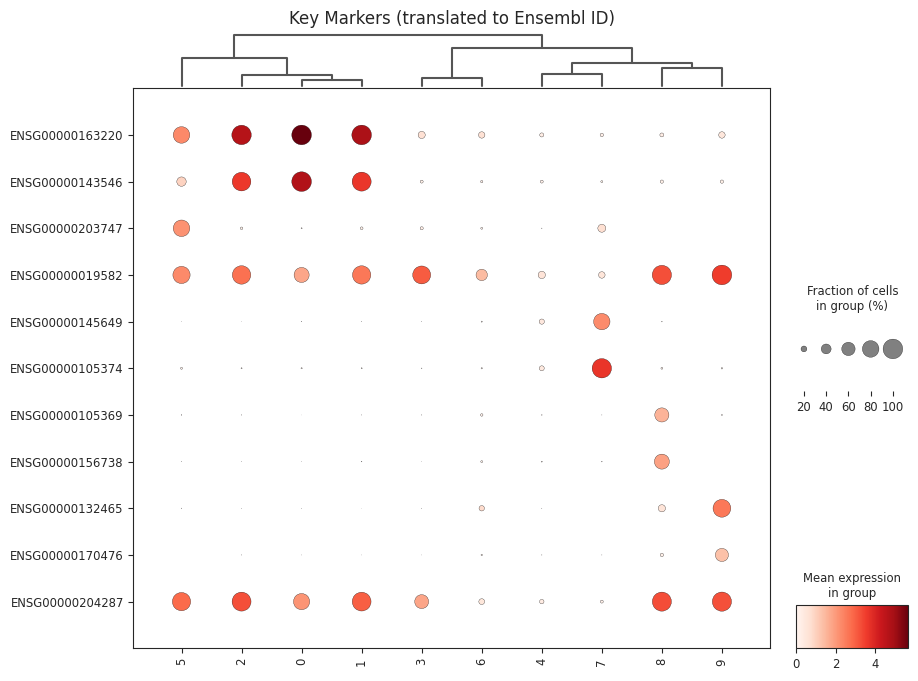

In [24]:
if ids_to_plot:
    sc.pl.dotplot(adata,
                  var_names=ids_to_plot[:12],  # берем первые 12, чтобы не перегружать
                  groupby='cluster',
                  use_raw=True,           # КЛЮЧЕВОЙ ПАРАМЕТР
                  dendrogram=True,
                  swap_axes=True,
                  figsize=(10, 8),
                  title='Key Markers (translated to Ensembl ID)')
else:
    print("Не удалось перевести ни одного гена для визуализации")

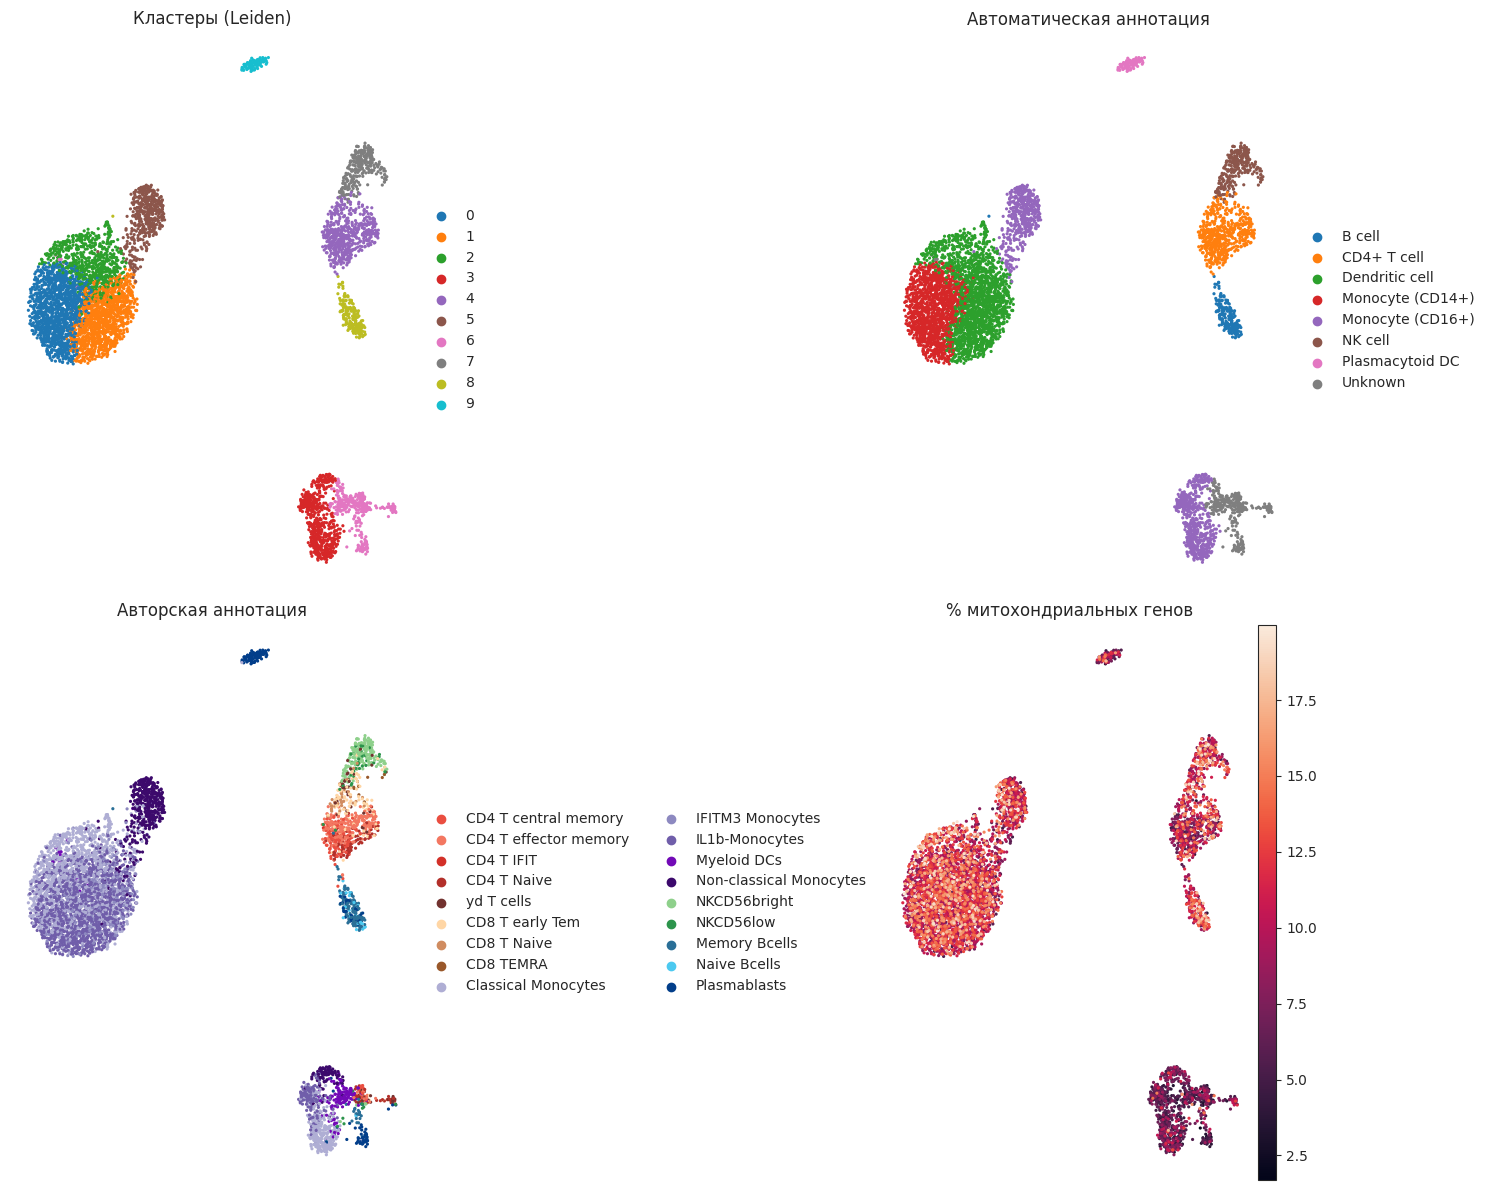

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sc.pl.umap(adata, color=['cluster'], ax=axes[0, 0],
           title='Кластеры (Leiden)', show=False, frameon=False)

sc.pl.umap(adata, color=['auto_annotation'], ax=axes[0, 1],
           title='Автоматическая аннотация', show=False, frameon=False)

if 'cell_type' in adata.obs.columns:
    sc.pl.umap(adata, color=['fine_annot'], ax=axes[1, 0],
               title='Авторская аннотация', show=False, frameon=False)

    if 'pct_counts_mt' in adata.obs.columns:
        sc.pl.umap(adata, color=['pct_counts_mt'], ax=axes[1, 1],
                   title='% митохондриальных генов', show=False, frameon=False)
    else:
        sc.pl.umap(adata, color=['total_counts'], ax=axes[1, 1],
                   title='Общее количество молекул', show=False, frameon=False)

plt.tight_layout()
plt.show()

In [26]:
if all(col in adata.obs.columns for col in ['donor_id', 'disease', 'fine_annot']):
    cell_counts_final = adata.obs.groupby(
        ['donor_id', 'disease', 'fine_annot']
    ).size().unstack(fill_value=0)

    # Сохраняем результаты
    cell_counts_final.to_csv('cell_counts_author_annotated.csv')

    adata.write('adata_annotated.h5ad', compression='gzip')

In [27]:
cell_counts = adata.obs.groupby(
    ['donor_id', 'disease', 'fine_annot']
).size().unstack(fill_value=0)

cell_counts = cell_counts.reset_index()

In [28]:
if 'total_cells' not in cell_counts.columns:
    service_cols = ['donor_id']
    disease_candidates = [col for col in cell_counts.columns if 'disease' in col.lower() or 'condition' in col.lower()]
    if disease_candidates:
        service_cols.append(disease_candidates[0])

    cell_type_cols = [col for col in cell_counts.columns if col not in service_cols]
    cell_counts['total_cells'] = cell_counts[cell_type_cols].sum(axis=1)

if (cell_counts['total_cells'] == 0).sum() > 0:
    zero_donors = cell_counts[cell_counts['total_cells'] == 0]['donor_id'].tolist()

    if disease_candidates:
        disease_col = disease_candidates[0]
        zero_by_disease = cell_counts[cell_counts['total_cells'] == 0][disease_col].value_counts()
        for condition, count in zero_by_disease.items():
            print(f"  {condition}: {count} доноров")

  rheumatoid arthritis: 18 доноров
  normal: 18 доноров


In [29]:
original_size = len(cell_counts)

cell_counts_filtered = cell_counts[cell_counts['total_cells'] > 0].copy()

service_cols = ['donor_id', 'total_cells']
disease_candidates = [col for col in cell_counts_filtered.columns if 'disease' in col.lower() or 'condition' in col.lower()]
if disease_candidates:
    service_cols.append(disease_candidates[0])

cell_type_cols = [col for col in cell_counts_filtered.columns if col not in service_cols]


In [30]:
if disease_candidates:
    disease_col = disease_candidates[0]
    print(f"РАСПРЕДЕЛЕНИЕ ПО ЗАБОЛЕВАНИЮ ПОСЛЕ ФИЛЬТРАЦИИ:")
    disease_dist = cell_counts_filtered[disease_col].value_counts()
    for condition, count in disease_dist.items():
        percentage = (count / len(cell_counts_filtered)) * 100
        print(f"  {condition}: {count} доноров ({percentage:.1f}%)")

РАСПРЕДЕЛЕНИЕ ПО ЗАБОЛЕВАНИЮ ПОСЛЕ ФИЛЬТРАЦИИ:
  rheumatoid arthritis: 18 доноров (50.0%)
  normal: 18 доноров (50.0%)


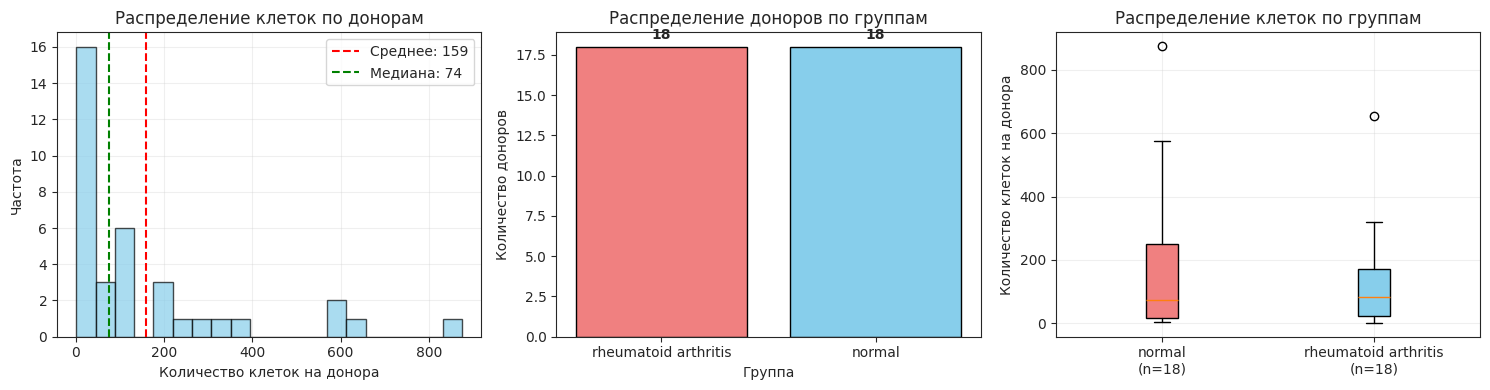

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(cell_counts_filtered['total_cells'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(cell_counts_filtered['total_cells'].mean(), color='red', linestyle='--', label=f'Среднее: {cell_counts_filtered["total_cells"].mean():.0f}')
axes[0].axvline(cell_counts_filtered['total_cells'].median(), color='green', linestyle='--', label=f'Медиана: {cell_counts_filtered["total_cells"].median():.0f}')
axes[0].set_xlabel('Количество клеток на донора')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение клеток по донорам')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

if disease_candidates:
    disease_col = disease_candidates[0]
    disease_counts = cell_counts_filtered[disease_col].value_counts()
    colors = ['lightcoral', 'skyblue', 'lightgreen', 'gold'][:len(disease_counts)]
    axes[1].bar(disease_counts.index, disease_counts.values, color=colors, edgecolor='black')
    axes[1].set_xlabel('Группа')
    axes[1].set_ylabel('Количество доноров')
    axes[1].set_title('Распределение доноров по группам')
    for i, (idx, val) in enumerate(disease_counts.items()):
        axes[1].text(i, val + 0.5, str(val), ha='center', fontweight='bold')

if disease_candidates:
    import pandas as pd
    disease_col = disease_candidates[0]
    boxplot_data = []
    labels = []
    for condition in cell_counts_filtered[disease_col].unique():
        condition_data = cell_counts_filtered[cell_counts_filtered[disease_col] == condition]['total_cells']
        boxplot_data.append(condition_data)
        labels.append(f"{condition}\n(n={len(condition_data)})")

    bp = axes[2].boxplot(boxplot_data, labels=labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], ['lightcoral', 'skyblue', 'lightgreen', 'gold'][:len(boxplot_data)]):
        patch.set_facecolor(color)
    axes[2].set_ylabel('Количество клеток на донора')
    axes[2].set_title('Распределение клеток по группам')
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('donor_filtering_results.png', dpi=150, bbox_inches='tight')
plt.show()

In [32]:
cell_counts = cell_counts_filtered.copy()

In [33]:
cell_counts.to_csv('cell_counts_for_analysis.csv', index=False)

donor_metadata = cell_counts[['donor_id', 'disease']].copy()
donor_metadata.to_csv('donor_metadata.csv', index=False)

cell_type_descriptions = pd.DataFrame({
    'cell_type': cell_counts.columns[2:-1] if 'total_cells' in cell_counts.columns else cell_counts.columns[2:]
})
cell_type_descriptions.to_csv('cell_type_descriptions.csv', index=False)

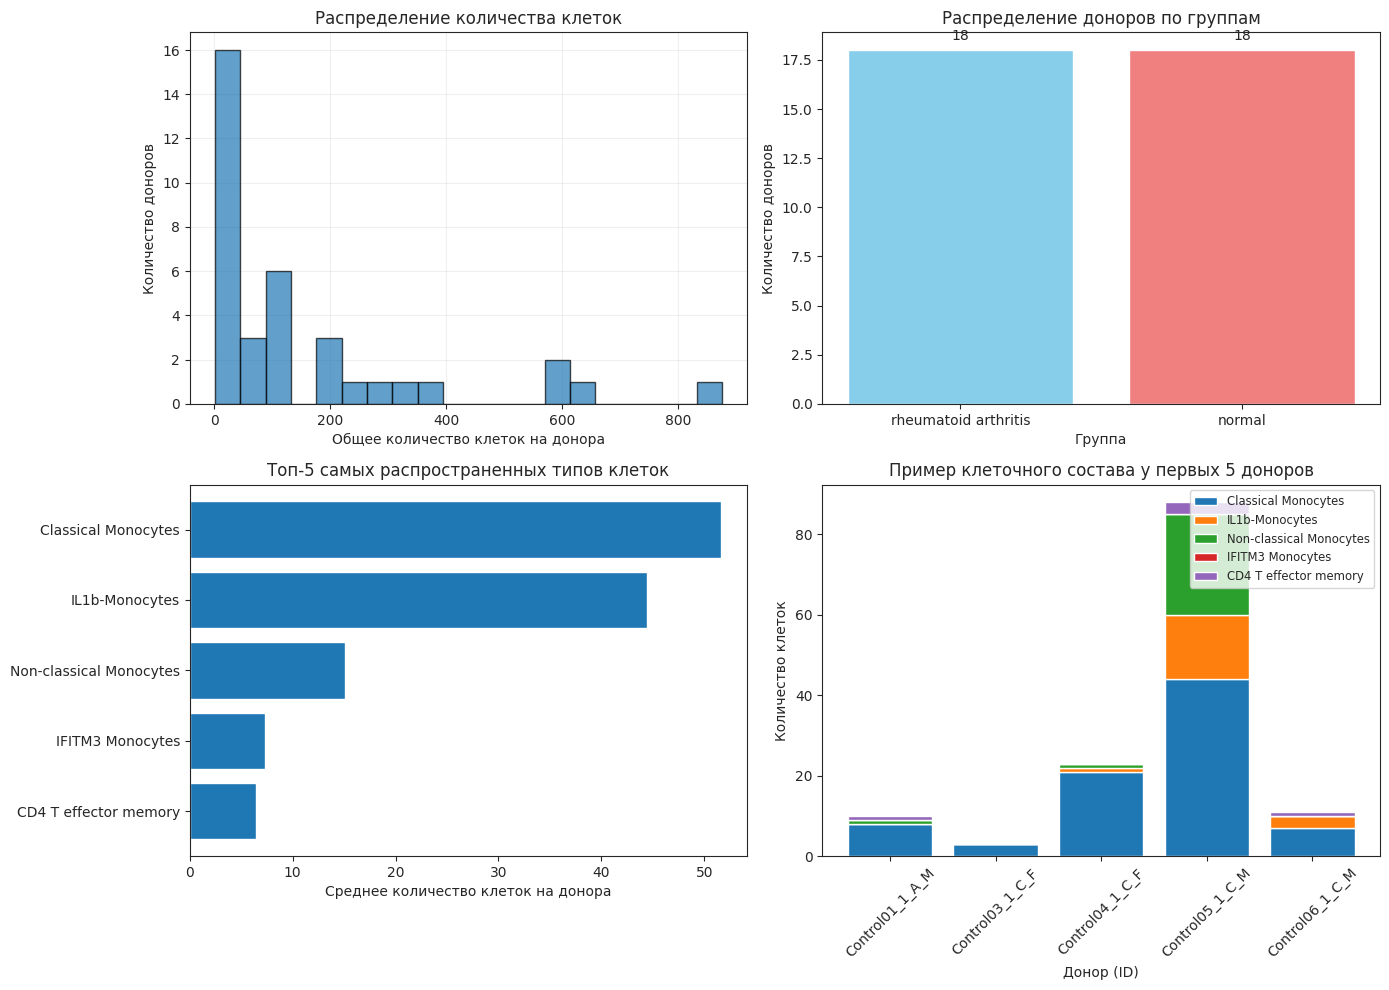

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(cell_counts['total_cells'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Общее количество клеток на донора')
axes[0, 0].set_ylabel('Количество доноров')
axes[0, 0].set_title('Распределение количества клеток')
axes[0, 0].grid(True, alpha=0.3)

group_counts = cell_counts['disease'].value_counts()
axes[0, 1].bar(group_counts.index, group_counts.values, color=['skyblue', 'lightcoral'])
axes[0, 1].set_xlabel('Группа')
axes[0, 1].set_ylabel('Количество доноров')
axes[0, 1].set_title('Распределение доноров по группам')
for i, v in enumerate(group_counts.values):
    axes[0, 1].text(i, v + 0.5, str(v), ha='center')

mean_composition = cell_counts.iloc[:, 2:-1].mean().sort_values(ascending=False).head(5)
axes[1, 0].barh(range(len(mean_composition)), mean_composition.values)
axes[1, 0].set_yticks(range(len(mean_composition)))
axes[1, 0].set_yticklabels(mean_composition.index)
axes[1, 0].set_xlabel('Среднее количество клеток на донора')
axes[1, 0].set_title('Топ-5 самых распространенных типов клеток')
axes[1, 0].invert_yaxis()

sample_donors = cell_counts.head(5)
x = range(len(sample_donors))
bottom = np.zeros(len(sample_donors))

top_cell_types = mean_composition.index.tolist()

for i, cell_type in enumerate(top_cell_types):
    if cell_type in sample_donors.columns:
        axes[1, 1].bar(x, sample_donors[cell_type], bottom=bottom, label=cell_type)
        bottom += sample_donors[cell_type].values

axes[1, 1].set_xlabel('Донор (ID)')
axes[1, 1].set_ylabel('Количество клеток')
axes[1, 1].set_title('Пример клеточного состава у первых 5 доноров')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(sample_donors['donor_id'].tolist(), rotation=45)
axes[1, 1].legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.savefig('data_quality_check.png', dpi=150, bbox_inches='tight')
plt.show()

In [35]:
disease_candidates = ['disease']

In [36]:
proportions = cell_counts.copy()
cell_type_columns = [col for col in proportions.columns
                     if col not in ['donor_id', 'disease', 'total_cells']]

for col in cell_type_columns:
    proportions[col] = proportions[col] / proportions['total_cells']

proportions.to_csv('cell_proportions_for_ttest.csv', index=False)

group_sle = proportions[proportions['disease'] == 'systemic lupus erythematosus']
group_normal = proportions[proportions['disease'] == 'normal']

In [37]:
disease_col = 'disease'

cell_counts = pd.read_csv('cell_counts_for_analysis.csv')

donor_col = 'donor_id'

metadata_cols = [donor_col, 'disease', 'total_cells']
cell_type_cols = [col for col in cell_counts.columns if col not in metadata_cols]

sccoda_df = cell_counts[cell_type_cols + ['disease']].copy()

adata_sccoda = dat.from_pandas(
    sccoda_df,
    covariate_columns=["disease"]
)

In [39]:
proportions = sccoda_df[cell_type_cols].div(sccoda_df[cell_type_cols].sum(axis=1), axis=0)
proportions['disease'] = sccoda_df['disease']

mean_props = proportions.groupby('disease').mean()
print("\nСредние пропорции по группам (первые 5 типов клеток):")
print(mean_props.iloc[:, :5].round(4))



Средние пропорции по группам (первые 5 типов клеток):
                      CD4 T central memory  CD4 T effector memory  CD4 T IFIT  \
disease                                                                         
normal                              0.0296                 0.0344      0.0003   
rheumatoid arthritis                0.0290                 0.0362      0.0002   

                      CD4 T Naive  yd T cells  
disease                                        
normal                     0.0687      0.0228  
rheumatoid arthritis       0.0463      0.0356  


In [40]:
adata_sccoda.write('cell_counts_sccoda.h5ad', compression='gzip')


In [41]:
cell_counts[['donor_id'] + cell_type_cols + ['disease']].to_csv(
    'cell_counts_sccoda_format_debug.csv', index=False
)

t-test analysis:

In [42]:
proportions = pd.read_csv('cell_counts_for_analysis.csv', index_col=0)
metadata = pd.read_csv('donor_metadata.csv')

analysis_df = proportions.merge(
    metadata,
    left_index=True,
    right_on='donor_id',
    suffixes=('_prop', '_meta')
)

cell_type_columns = [col for col in proportions.columns
                     if col not in ['disease', 'total_cells']]

group_col = 'disease_prop'
groups = analysis_df[group_col].unique()

In [43]:
group1, group2 = groups[0], groups[1]

results = []
for cell_type in cell_type_columns:
    data_group1 = analysis_df[analysis_df[group_col] == group1][cell_type]
    data_group2 = analysis_df[analysis_df[group_col] == group2][cell_type]

    if len(data_group1) >= 3 and len(data_group2) >= 3:
        t_stat, p_val = ttest_ind(data_group1, data_group2, equal_var=False, nan_policy='omit')
        mean_diff = data_group1.mean() - data_group2.mean()
        results.append({
            'cell_type': cell_type,
            'mean_diff': mean_diff,
            't_statistic': t_stat,
            'p_value': p_val
        })

ttest_results = pd.DataFrame(results)

if len(ttest_results) > 0:
    ttest_results['p_value_adj'] = multipletests(ttest_results['p_value'], method='fdr_bh')[1]
    ttest_results['significant'] = ttest_results['p_value_adj'] < 0.05

    ttest_results.sort_values('p_value').to_csv('ttest_results.csv', index=False)
    print(f"Значимых типов клеток (FDR < 0.05): {ttest_results['significant'].sum()} из {len(ttest_results)}")

    print("Топ-5 значимых типов клеток по t-test:")
    print(ttest_results[ttest_results['significant']].sort_values('p_value').head(5)[['cell_type', 'mean_diff', 'p_value_adj']])

Значимых типов клеток (FDR < 0.05): 0 из 18
Топ-5 значимых типов клеток по t-test:
Empty DataFrame
Columns: [cell_type, mean_diff, p_value_adj]
Index: []


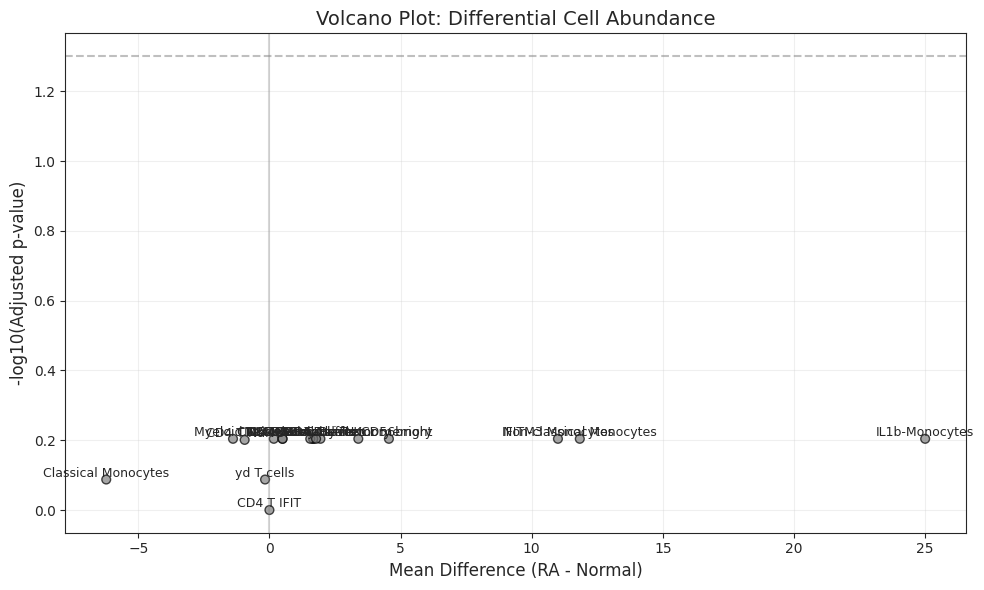

In [44]:
plt.figure(figsize=(10, 6))

colors = ['red' if sig else 'gray' for sig in ttest_results['significant']]
sizes = [80 if sig else 40 for sig in ttest_results['significant']]

plt.scatter(ttest_results['mean_diff'],
            -np.log10(ttest_results['p_value_adj']),
            c=colors, s=sizes, alpha=0.7, edgecolors='black')

for i, row in ttest_results.iterrows():
    plt.text(row['mean_diff'],
             -np.log10(row['p_value_adj']),
             row['cell_type'],
             fontsize=9, ha='center', va='bottom')

plt.axhline(-np.log10(0.05), color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='-', alpha=0.3)

plt.xlabel('Mean Difference (RA - Normal)', fontsize=12)
plt.ylabel('-log10(Adjusted p-value)', fontsize=12)
plt.title('Volcano Plot: Differential Cell Abundance', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('volcano_plot.png', dpi=300)
plt.show()

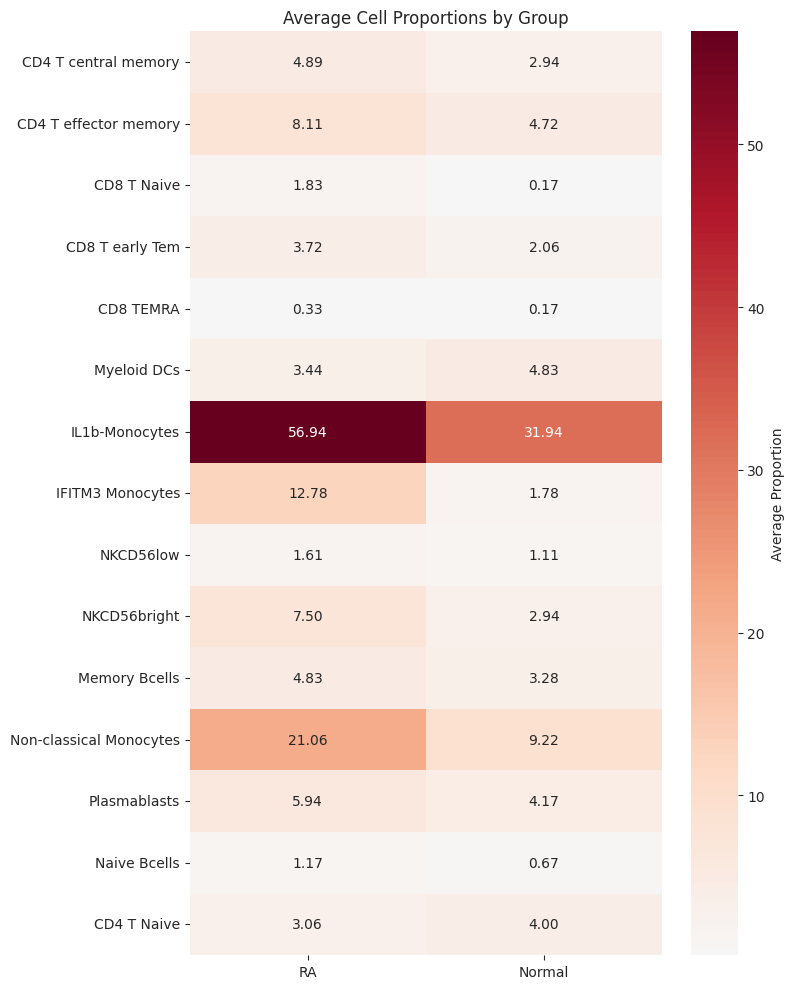

In [45]:
top_cells = ttest_results.sort_values('p_value_adj').head(15)['cell_type'].tolist()

group_means = pd.DataFrame({
    'RA': analysis_df[analysis_df[group_col] == group1][top_cells].mean(),
    'Normal': analysis_df[analysis_df[group_col] == group2][top_cells].mean()
})

plt.figure(figsize=(8, 10))
sns.heatmap(group_means,
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Average Proportion'})
plt.title('Average Cell Proportions by Group')
plt.tight_layout()
plt.savefig('heatmap_group_means.png', dpi=300)
plt.show()

scCODA analysis:

In [55]:
counts_df = pd.read_csv('cell_counts_sccoda_format_debug.csv', index_col=0)
metadata_df = pd.read_csv('donor_metadata.csv').set_index('donor_id')

cols_to_drop = ['disease', 'total_cells', 'fine_annot']
existing_cols = [col for col in cols_to_drop if col in counts_df.columns]

if existing_cols:
    counts_df = counts_df.drop(columns=existing_cols)

sccoda_df = counts_df.join(metadata_df, how='inner')

adata_sccoda = dat.from_pandas(
    sccoda_df,
    covariate_columns=["disease"]
)


model = mod.CompositionalAnalysis(
    data=adata_sccoda,
    formula="disease",
    reference_cell_type="automatic",
    automatic_reference_absence_threshold=0.25
)

Automatic reference selection! Reference cell type set to Memory Bcells
Zero counts encountered in data! Added a pseudocount of 0.5.


In [56]:
results = model.sample_hmc()

results.save("sccoda_results")

print("Краткие результаты scCODA:")
summary = results.summary()
print(summary)

credible_effects = results.credible_effects()
print(f"Значимо измененные типы клеток (вероятность > 0.95): {credible_effects.sum()}")

100%|██████████| 20000/20000 [05:42<00:00, 58.41it/s]


MCMC sampling finished. (424.078 sec)
Acceptance rate: 59.9%
Краткие результаты scCODA:
Compositional Analysis summary:

Data: 36 samples, 18 cell types
Reference index: 15
Formula: disease

Intercepts:
                         Final Parameter  Expected Sample
Cell Type                                                
CD4 T central memory               0.227         6.161222
CD4 T effector memory              0.455         7.739020
CD4 T IFIT                        -0.664         2.527612
CD4 T Naive                        0.253         6.323514
yd T cells                        -0.124         4.337400
CD8 T early Tem                   -0.015         4.836905
CD8 T Naive                       -0.469         3.071835
CD8 TEMRA                         -0.585         2.735393
Classical Monocytes                2.306        49.268014
IFITM3 Monocytes                  -0.277         3.722052
IL1b-Monocytes                     1.606        24.465772
Myeloid DCs                        0.232   

<Axes: xlabel='Cell type', ylabel='Proportion'>

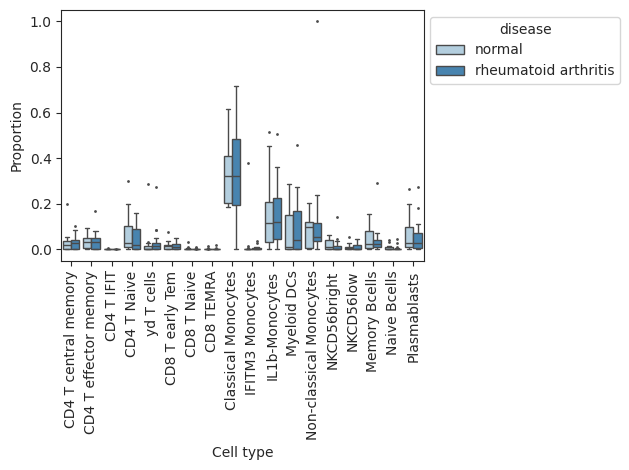

In [58]:
viz.boxplots(adata_sccoda, feature_name="disease")

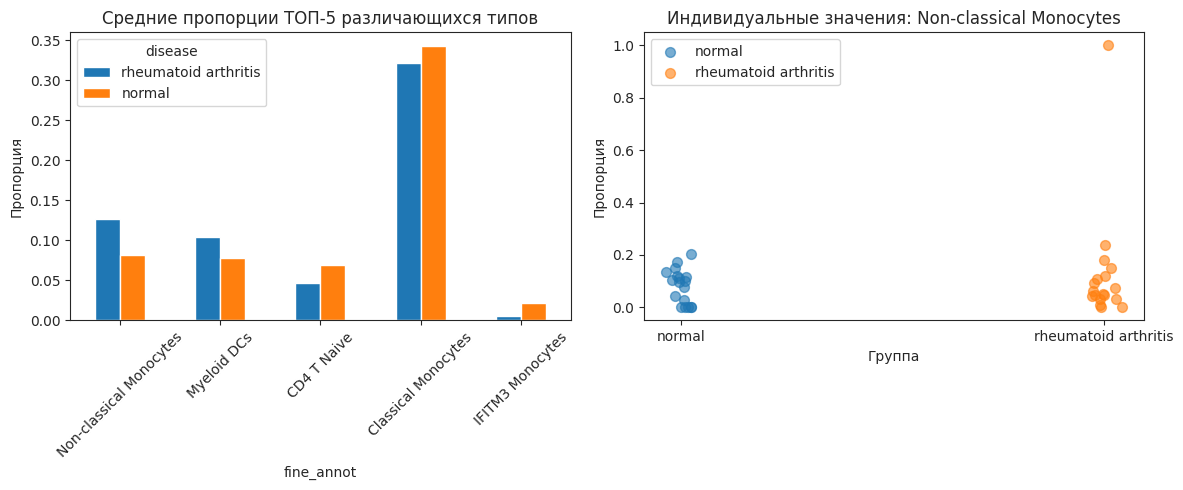

Максимальная разница в пропорциях: 0.046


In [60]:
cell_counts_crosstab = pd.crosstab(
    index=adata.obs['donor_id'],
    columns=adata.obs['fine_annot']
)

disease_map = adata.obs.groupby('donor_id')['disease'].first()
cell_counts_crosstab['disease'] = disease_map

if 'disease' in cell_counts_crosstab.columns:
    groups = cell_counts_crosstab['disease'].unique()
    if len(groups) >= 2:
        cell_cols = [c for c in cell_counts_crosstab.columns if c != 'disease']
        props = cell_counts_crosstab[cell_cols].div(cell_counts_crosstab[cell_cols].sum(axis=1), axis=0)
        props['disease'] = cell_counts_crosstab['disease']

        mean_props = props.groupby('disease').mean()

        if len(mean_props) >= 2:
            diff = mean_props.iloc[0] - mean_props.iloc[1]
            top_diff = diff.abs().nlargest(5).index

            fig, axes = plt.subplots(1, 2, figsize=(12, 5))

            mean_props[top_diff].T.plot(kind='bar', ax=axes[0])
            axes[0].set_title('Средние пропорции ТОП-5 различающихся типов')
            axes[0].set_ylabel('Пропорция')
            axes[0].tick_params(axis='x', rotation=45)

            for disease_type in groups:
                donor_props = props[props['disease']==disease_type][top_diff[0]]
                jitter = np.random.normal(0, 0.02, size=len(donor_props))
                axes[1].scatter(
                    [groups.tolist().index(disease_type)+1 + j for j in jitter],
                    donor_props,
                    alpha=0.6,
                    label=disease_type,
                    s=50
                )
            axes[1].set_title(f'Индивидуальные значения: {top_diff[0]}')
            axes[1].set_xlabel('Группа')
            axes[1].set_ylabel('Пропорция')
            axes[1].set_xticks([1, 2])
            axes[1].set_xticklabels(groups[:2])
            axes[1].legend()

            plt.tight_layout()
            plt.show()

            print(f"Максимальная разница в пропорциях: {diff.abs().max():.3f}")

При агрегации разных групп больных значимые изменения нивелировались, и поэтому оба теста снова ничего не выявили.
В третьем ноутбуке есть примеры, сделанные на искуственных данных.